## DSBDAL Assignment 6

## Data analytics III

#### Importing required libraries

In [76]:
import pandas as pd
import string
import seaborn as sns
#from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

#### Loading the dataset

In [77]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
data.shape

(150, 5)

In [79]:
missing_values_count = data.isnull().sum() ## summing up the null value counts for all columns 
missing_values_count

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [80]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#### Some preprocessing steps

In [81]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [82]:
data['species'].replace('setosa','0',inplace = True)
data['species'].replace('versicolor','1',inplace = True)
data['species'].replace('virginica','2',inplace = True)
data.astype(int)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5,3,1,0,0
1,4,3,1,0,0
2,4,3,1,0,0
3,4,3,1,0,0
4,5,3,1,0,0
...,...,...,...,...,...
145,6,3,5,2,2
146,6,2,5,1,2
147,6,3,5,2,2
148,6,3,5,2,2


In [83]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking for outliers

#### (i) sepal-length

<AxesSubplot:xlabel='sepal_length'>

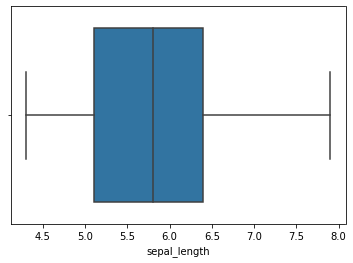

In [84]:
sns.boxplot(x = data['sepal_length']) ## No outliers

#### (ii) sepal-width

<AxesSubplot:xlabel='sepal_width'>

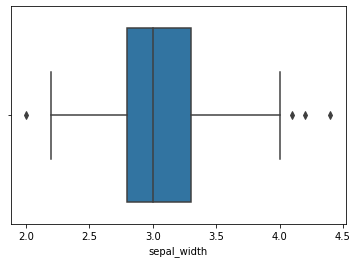

In [85]:
sns.boxplot(x = data['sepal_width'])

In [86]:
Q1 = np.percentile(data['sepal_width'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data['sepal_width'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(data['sepal_width'] >= (Q3+1.5*IQR))
lower = np.where(data['sepal_width'] <= (Q1-1.5*IQR))
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

In [87]:
data.shape

(146, 5)

<AxesSubplot:xlabel='sepal_width'>

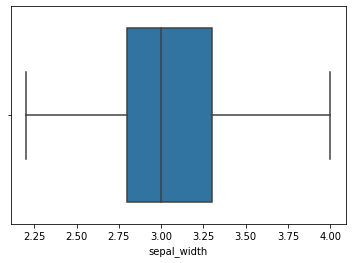

In [88]:
sns.boxplot(x = data['sepal_width'])

#### (iii) petal length 

<AxesSubplot:xlabel='petal_length'>

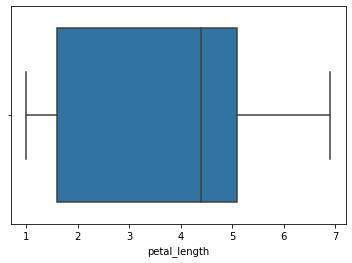

In [89]:
sns.boxplot(x = data['petal_length'])

#### (iv) petal width 

<AxesSubplot:xlabel='petal_width'>

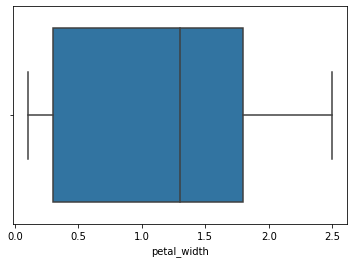

In [90]:
sns.boxplot(x = data['petal_width'])

#### Using the minmax scaler on the data 

In [91]:
X = np.array(data.iloc[:,0:4])
y = np.array(data.iloc[:,-1]).reshape(-1, 1)
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape,y.shape)

(146, 4) (146, 1)


#### Performing the train-test split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Training the model

In [93]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9459459459459459


### Evaluating the model

#### (i) Plotting the confusion matrix 

In [94]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

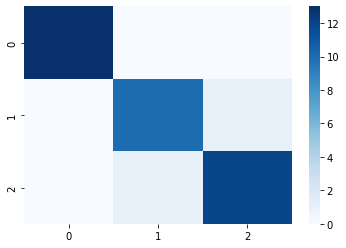

In [95]:
'''l1 = ['TN','FP','FN','TP']
l2 = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(l1,l2)]
labels = np.asarray(labels).reshape(3,3)
annot=labels'''
sns.heatmap(confusion_matrix , cmap='Blues',fmt='')

#### (ii) Calculating the accuracy score

In [96]:
accuracy_score(y_test,y_pred)

0.9459459459459459

#### (iii) Calculating the error rate 

In [97]:
1 - accuracy_score(y_test,y_pred)

0.05405405405405406

#### (iv) Calculating the precision

In [98]:
precision_score(y_test,y_pred,average = 'weighted')
## Precision = TP/ (TP + FP)

0.9459459459459459

#### (v) Calculating the recall

In [99]:
recall_score(y_test,y_pred,average = 'weighted')
## Recall = TP/ (TP + FN)

0.9459459459459459

#### (vi) Calculating the f1-score

In [100]:
## F-1 score = (2 *precison * recall) / (precision + recall)
f1_score(y_test,y_pred,average = 'weighted')

0.9459459459459459